<a href="https://colab.research.google.com/github/mariawjiang/env617_txenergy/blob/main/Jiang_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# install necessary modules
! pip install fiona shapely pyproj rtree --q # need to install geopandas dependencies (geopandas will not auto install dependencies with pip)
! pip install geopandas --q # geopandas/
! pip install plotnine --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Basics
import pandas as pd
import numpy as np

# geo
import geopandas as gpd
from shapely.geometry import Polygon

# Plotnine
from plotnine import *
import plotnine

In [5]:
#Read in data to dataframe

! wget https://97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com/HydroLAKES_polys_v10_shp.zip

--2023-04-10 23:11:13--  https://97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com/HydroLAKES_polys_v10_shp.zip
Resolving 97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com (97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com)... 23.41.168.214
Connecting to 97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com (97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com)|23.41.168.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 820295132 (782M) [application/zip]
Saving to: ‘HydroLAKES_polys_v10_shp.zip.3’

HydroLAKES_polys_v1 100%[===================>] 782.29M  90.4MB/s    in 9.7s    

2023-04-10 23:11:23 (80.3 MB/s) - ‘HydroLAKES_polys_v10_shp.zip.3’ saved [820295132/820295132]



In [6]:
! ls HydroLAKES_polys_v10_shp.zip

HydroLAKES_polys_v10_shp.zip


In [7]:
! unzip HydroLAKES_polys_v10_shp.zip


Archive:  HydroLAKES_polys_v10_shp.zip
replace HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.dbf  
replace HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.prj  
replace HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.sbn? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.sbn  
replace HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.sbx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.sbx  
  inflating: HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.shp  
  inflating: HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.shx  
  inflating: HydroLAKES_TechDoc_v10.pdf  


In [8]:
shape = "HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.shp"
df_lake = gpd.read_file(shape)

In [9]:
df_lake.head()

,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,...,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,geometry
0,1,Caspian Sea,Russia,Europe,SWBD,1,0,377001.91,15829.37,7.27,...,1,200.5,8110.642,107883.0,-29,-1.0,1404108.0,47.717708,45.591934,"POLYGON ((49.96181 37.43847, 49.96457 37.44022..."
1,2,Great Bear,Canada,North America,CanVec,1,0,30450.64,5331.72,8.62,...,1,72.2,535.187,47577.7,145,-1.0,147665.4,-123.505546,65.138384,"POLYGON ((-119.78782 67.03574, -119.78637 67.0..."
2,3,Great Slave,Canada,North America,CanVec,1,0,26734.29,9814.16,16.93,...,1,59.1,4350.692,4203.2,148,-1.0,995312.3,-117.617115,61.311727,"POLYGON ((-109.93976 62.95851, -109.93831 62.9..."
3,4,Winnipeg,Canada,North America,CanVec,3,709,23923.04,4018.32,7.33,...,1,11.9,2244.727,1464.3,215,-1.0,919611.5,-97.863542,53.696359,"POLYGON ((-98.80636 53.88021, -98.80578 53.880..."
4,5,Superior,United States of America,North America,SWBD,1,0,81843.92,5248.36,5.18,...,1,146.7,2869.953,48410.3,179,-1.0,209219.5,-84.460547,46.468593,"POLYGON ((-90.72250 46.65740, -90.72458 46.657..."


In [10]:
df_lake.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1427688 entries, 0 to 1427687
Data columns (total 22 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   Hylak_id   1427688 non-null  int64   
 1   Lake_name  3022 non-null     object  
 2   Country    1427688 non-null  object  
 3   Continent  1427688 non-null  object  
 4   Poly_src   1427688 non-null  object  
 5   Lake_type  1427688 non-null  int64   
 6   Grand_id   1427688 non-null  int64   
 7   Lake_area  1427688 non-null  float64 
 8   Shore_len  1427688 non-null  float64 
 9   Shore_dev  1427688 non-null  float64 
 10  Vol_total  1427688 non-null  float64 
 11  Vol_res    1427688 non-null  float64 
 12  Vol_src    1427688 non-null  int64   
 13  Depth_avg  1427688 non-null  float64 
 14  Dis_avg    1427688 non-null  float64 
 15  Res_time   1427688 non-null  float64 
 16  Elevation  1427688 non-null  int64   
 17  Slope_100  1427688 non-null  float64 
 18  Wshd_area  142

<Axes: >

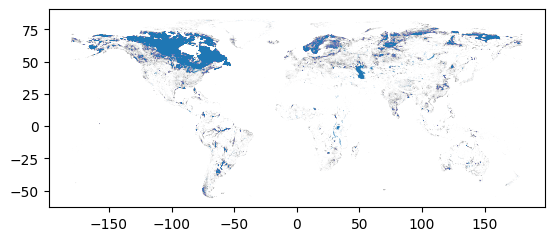

In [11]:
df_lake.plot()

In [12]:
#read in HydroBasins data

! wget https://www.dropbox.com/sh/hmpwobbz9qixxpe/AACiujdXJ5DfsaK7zcKOJyZpa/HydroBASINS/customized/af/hybas_lake_af_lev01-12_v1c.zip?dl=0

--2023-04-10 23:30:42--  https://www.dropbox.com/sh/hmpwobbz9qixxpe/AACiujdXJ5DfsaK7zcKOJyZpa/HydroBASINS/customized/af/hybas_lake_af_lev01-12_v1c.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/hmpwobbz9qixxpe/AACiujdXJ5DfsaK7zcKOJyZpa/HydroBASINS/customized/af/hybas_lake_af_lev01-12_v1c.zip [following]
--2023-04-10 23:30:42--  https://www.dropbox.com/sh/raw/hmpwobbz9qixxpe/AACiujdXJ5DfsaK7zcKOJyZpa/HydroBASINS/customized/af/hybas_lake_af_lev01-12_v1c.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb06a6ab16d75d82b8bc53d6b28.dl.dropboxusercontent.com/cd/0/inline/B5-j2bLq0JWoxfTz4GSI2KsLAUFKHDoRZpU511sRyx26xVhTGCApNMJPf60WqtTKlJk0JWTx-nH8vYRifOrnrK6t7CKxWYKMlphFO7LHu2F0Sx4LYrJw7Onq3SZ1aaCdllMkDb3mZXUi9v2nfto4ZJWhyoY

In [13]:
! ls hybas_lake_af_lev01-12_v1c.zip?dl=0.1

'hybas_lake_af_lev01-12_v1c.zip?dl=0.1'


In [16]:
! unzip hybas_lake_af_lev01-12_v1c.zip?dl=0.1

Archive:  hybas_lake_af_lev01-12_v1c.zip?dl=0.1
replace hybas_lake_af_lev01_v1c.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [17]:
shape1 = "hybas_lake_af_lev01_v1c.shp"
df_basin1 = gpd.read_file(shape1)

shape2 = "hybas_lake_af_lev02_v1c.shp"
df_basin2 = gpd.read_file(shape2)

shape3 = "hybas_lake_af_lev03_v1c.shp"
df_basin3 = gpd.read_file(shape3)

shape4 = "hybas_lake_af_lev04_v1c.shp"
df_basin4 = gpd.read_file(shape4)

shape5 = "hybas_lake_af_lev05_v1c.shp"
df_basin5 = gpd.read_file(shape5)

shape6 = "hybas_lake_af_lev06_v1c.shp"
df_basin6 = gpd.read_file(shape6)

shape7 = "hybas_lake_af_lev07_v1c.shp"
df_basin7 = gpd.read_file(shape7)

shape8 = "hybas_lake_af_lev08_v1c.shp"
df_basin8 = gpd.read_file(shape8)

shape9 = "hybas_lake_af_lev09_v1c.shp"
df_basin9 = gpd.read_file(shape9)

In [26]:
df_basins=df_basin1.append([df_basin2, df_basin3, df_basin4, df_basin5, df_basin6, df_basin7, df_basin8, df_basin9])
print(df_basins)

<ipython-input-26-09db07271735>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


          HYBAS_ID   NEXT_DOWN   NEXT_SINK    MAIN_BAS  DIST_SINK  DIST_MAIN  \
0       1010000010           0  1010000010  1010000010        0.0        0.0   
0       1020000010           0  1020000010  1020000010        0.0        0.0   
1       1020011530           0  1020011530  1020011530        0.0        0.0   
2       1020018110           0  1020018110  1020018110        0.0        0.0   
3       1020021940           0  1020021940  1020021940        0.0        0.0   
...            ...         ...         ...         ...        ...        ...   
115621  1090082530  1091218980  1090082530  1090009010        0.0      415.8   
115622  1090082540           0  1090082540  1090082540        0.0        0.0   
115623  1090082570           0  1090082570  1090082570        0.0        0.0   
115624  1090082590  1091221572  1090082590  1090009010        0.0      417.3   
115625  1090082610           0  1090082610  1090082610        0.0        0.0   

          SUB_AREA     UP_AREA    PFAF_

In [53]:
url='https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/basin_temp_africa_2000_2014.csv'
df_temp=pd.read_csv(url)

df_temp.head()

,Year,HYBAS_ID,mean_annual_temp_k
0,2000,1120030770,291.392984
1,2000,1120032100,293.570814
2,2000,1121453520,297.826864
3,2000,1090048530,293.746552
4,2000,1120137260,294.257130


In [54]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17578 entries, 0 to 17577
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                17578 non-null  int64  
 1   HYBAS_ID            17578 non-null  int64  
 2   mean_annual_temp_k  17578 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 412.1 KB


In [73]:
#Calculate change in mean average temp between 2000 and 2014

df_temp_wide = pd.pivot(df_temp, values='mean_annual_temp_k', index='HYBAS_ID', columns='Year')

In [74]:
print(df_temp_wide)

Year              2000        2014
HYBAS_ID                          
1020011530  293.860050  294.006249
1030008100  298.930491  298.907453
1030008110  297.194428  297.007177
1030011660  295.516935  295.599848
1030012590  293.919608  294.596602
...                ...         ...
2120826590  294.008656  294.985769
2120826600  293.908179  294.884785
2120829200  293.930317  294.923461
2120829280  293.680884  294.690491
2121299810  293.922775  294.859357

[8789 rows x 2 columns]


In [75]:
df_temp_widenew=df_temp_wide.reset_index()

In [77]:
print(df_temp_widenew)

Year    HYBAS_ID        2000        2014
0     1020011530  293.860050  294.006249
1     1030008100  298.930491  298.907453
2     1030008110  297.194428  297.007177
3     1030011660  295.516935  295.599848
4     1030012590  293.919608  294.596602
...          ...         ...         ...
8784  2120826590  294.008656  294.985769
8785  2120826600  293.908179  294.884785
8786  2120829200  293.930317  294.923461
8787  2120829280  293.680884  294.690491
8788  2121299810  293.922775  294.859357

[8789 rows x 3 columns]


In [79]:
df_temp_widenew["temp_diff"] = df_temp_widenew["2014"] - df_temp_widenew["2000"]

KeyError: ignored